# Lab 01 - Linear Algebra and Numpy

Welcome to the first lab in CS3400! If you can edit this you probably have a working instance of jupyter notebook (either locally or on ROSIE). If you are looking at this as an pdf, maybe you still need to get an instance of Jupyter running. Please follow the neccessary steps in Experiment 1.

# TODO

more versicolor data exploration
logistic regression model for setosa vs. non setosa


# Experiment 1

In this experiment you will be making sure that you can connect to ROSIE and run an interactive session (jupyter notebook session).  You will have a username on ROSIE by the start of class, but if it is a new account you may have to reset your password. Ask your instructor for the default password. At the current time, to do this you will have to access the terminal on ROSIE - meaning you will have to ssh in. Once you have reset your password, you will be able to access ROSIE's web portal and initiate interactive session from there. The following steps and sections will give you what you need to start.

## Accessing ROSIE
An objective of this class is to give you some more experinece using remote resources and ROSIE is a great resource to have. Our current admin is Dr. Retert. Please refer to ROSIE's [webpage](https://msoe.dev/#/) as a first step in finding solutions to issues you may be having. Your instructor is also a good resource if troubleshooting is required.

### SSH Client
If you are on windows, you will have to download and install an ssh client. A commonly used and free client is [Putty](https://www.putty.org/). Please follow the link and install Putty on your machine.

### On network or off
If you are doing these steps off-campus, you will need to use a VPN to access the network that ROSIE is on. To do this you can follow the written instruction on [msoe.dev - Activiation](https://msoe.dev/#/access). 

### Starting an Interactive session
Once you have access to ROSIE's network (VPN) and you have a username and current password (done through the SSH client), you can now complete the steps for starting an interactive session. You should access [ROSIE's web portal](http://dh-ood.hpc.msoe.edu/) and start a jupyter notebook session to run (and complete) this notebook.

# Experiment 2 - Structuing your Data and Feature Matrices / Slicing
In this experiment you will refamiliarize yourself with python/numpy and use some of the common data manipulation techniques that you will need for the rest of the class.

## What is Numpy?
- Matrix library
- Memory-efficient data structures -- arrays
    - Used in scikit-learn, matplotlib, and others
- Expressive API for indexing and operations
- Time-efficient algorithms
    - Calls C and Fortran libraries where possible
    
## How Do I Import Libraries into my Jupyter Notebook working kernel?
- The following bit of code can be used to import libraries. The world is your oyster!

In [2]:
import numpy as np
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt
from IPython.display import Image
import os
import pandas as pd
import sklearn
data_path = 'IRIS.csv'
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.datasets import load_iris

IRIS.csv


## How to read in files, organize data, and plot some features!
In the first step you will read the IRIS.csv file that you are given (which is also on our class's datashare on ROSIE) and put the features into a matrix. In machine learning the standard for organizing matrices is always observations in rows, and features that describe the observations as columns. Read in the data file and assign the data to a numpy matrix.

1. Use the function numpy.loadtxt.
    - You will want to use the proper delimiter for the file you have.
    - Make sure that you skip any text rows, numpy matrices can only be a single datatype.
    - Depending on the dataset you may need to specify what columns you want to use.
    - If you get stuck and don't want to head to the web, you can always use the the help command for more information e.g. `help(np.loadtext)`

With your data matrix you should explore the data a bit.
2. Use `data.shape` to find your dimensions
3. Plot the first two features your data using matplotlib. Label all of your axes and use legends!
    1. Make a figure with a line plot
    2. Make another figure with a scatter plot
    3. Make a third figure displaying both the same line and scatter plots.
4. Print all of the feature values for the 150th observation in your dataset.
5. Select observations 49-52 from your dataset and print them to the notebook.
6. Select all of the entries in your dataset that have their first feature <= 5 and print the first 5 results. (hint: do this in multiple steps. First make a boolean mask of your matrix)
7. Calculate the median, standard deviation, and mode of the entries selected in the previous step. (Hint 1: these should be done column by column. Hint 2: Don't forget about other packages like scipy!)

### 1) Load the IRIS.csv file into a numpy matrix

#### A description of the dataset used in this notebook


In [50]:
iris_desc = load_iris().DESCR
print(iris_desc)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
iris = np.loadtxt(data_path, delimiter=',', skiprows=1, usecols=(0, 1, 2, 3))
print(iris)
iris_features_labels = load_iris().feature_names
print(iris_features_labels)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

### 2) Display its dimensions (`data.shape`)

In [4]:
print(f'Iris dataset shape: {iris.shape}')
print(f'4th sample from Iris dataset: {iris[3]}')

Iris dataset shape: (150, 4)
4th sample from Iris dataset: [4.6 3.1 1.5 0.2]


### Plot the first two features of your data using matplotlib. Label all of your axes and use legends!

### 3-A) Make a line plot of the first two dimensions using matplotlib

#### Making plot for sepal length

Text(0, 0.5, 'sepal length (cm)')

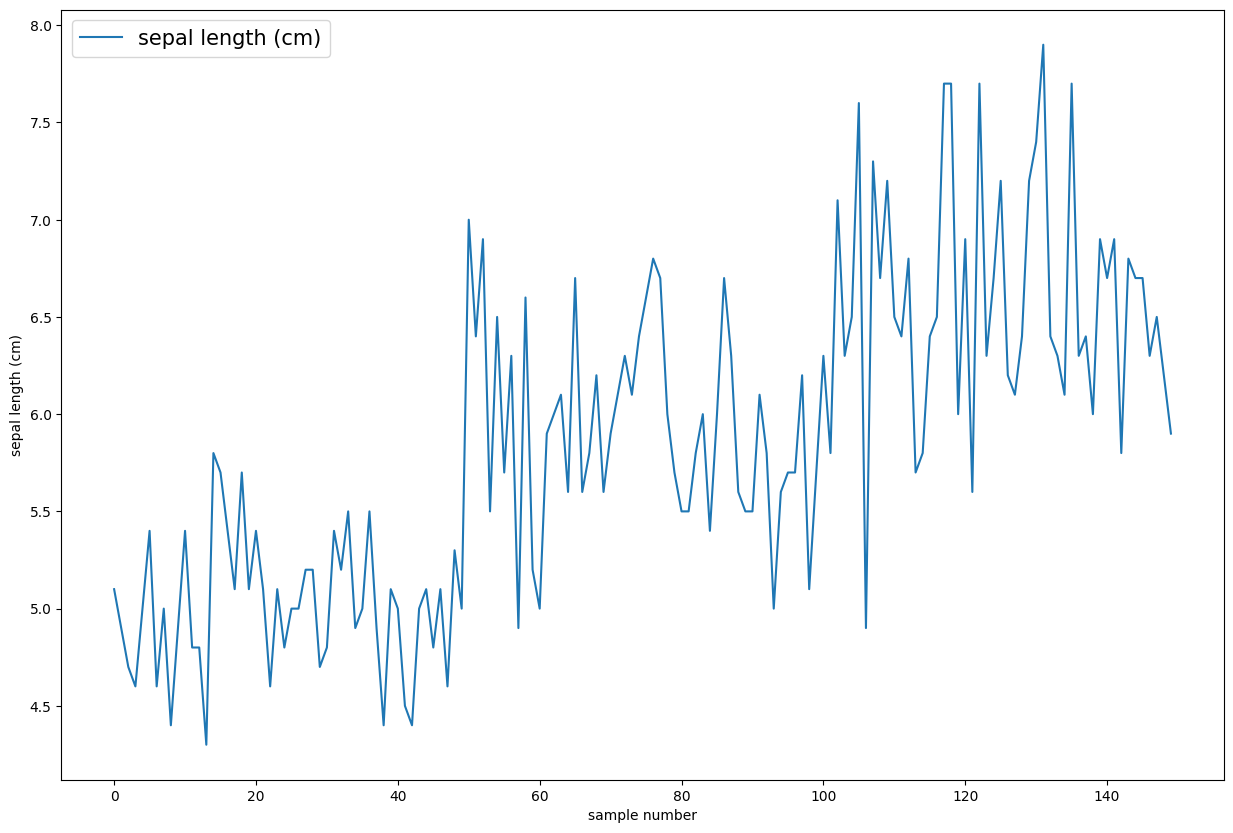

In [5]:
fig, ax = plt.subplots(figsize=(15,10))


ax.plot(iris[:,0:1], label=iris_features_labels[0])
ax.legend(loc='best', fontsize=15)
ax.set_xlabel('sample number')
ax.set_ylabel(iris_features_labels[0])


#### Making Sepal width graph

Text(0, 0.5, 'sepal width (cm)')

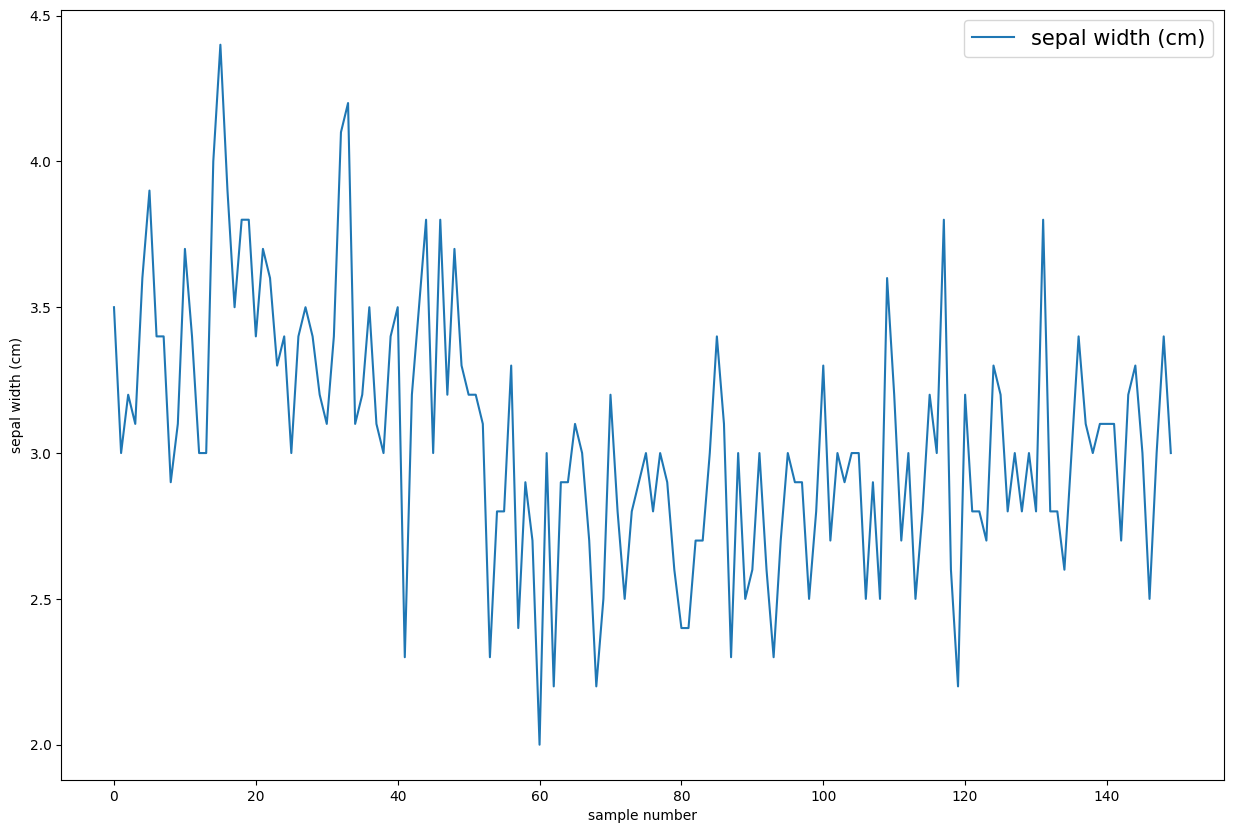

In [6]:
fig, ax = plt.subplots(figsize=(15,10))

ax.plot(iris[:,1:2], label=iris_features_labels[1])
ax.legend(loc='best', fontsize=15)
ax.set_xlabel('sample number')
ax.set_ylabel(iris_features_labels[1])

### 3-B) Make a scatter plot of the first two dimensions using matplot lib

Text(0, 0.5, 'sepal width (cm)')

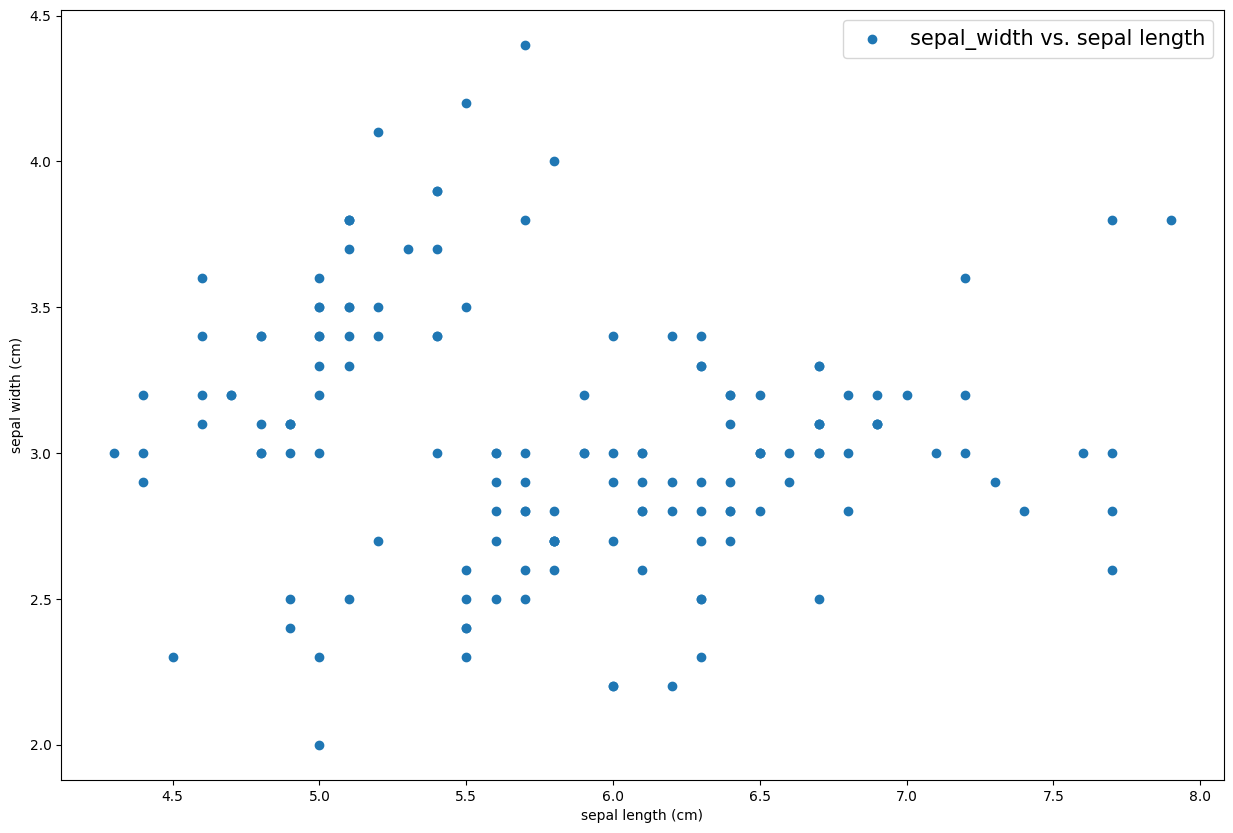

In [7]:
fig, ax = plt.subplots(figsize=(15,10))

ax.scatter(iris[:,0:1], iris[:,1:2], label='sepal_width vs. sepal length')
ax.legend(loc='best', fontsize=15)
ax.set_xlabel(iris_features_labels[0])
ax.set_ylabel(iris_features_labels[1])


### 3-C) Make a third figure displaying both the same line and scatter plots

Text(0.5, 1.0, 'Sepal length line plot')

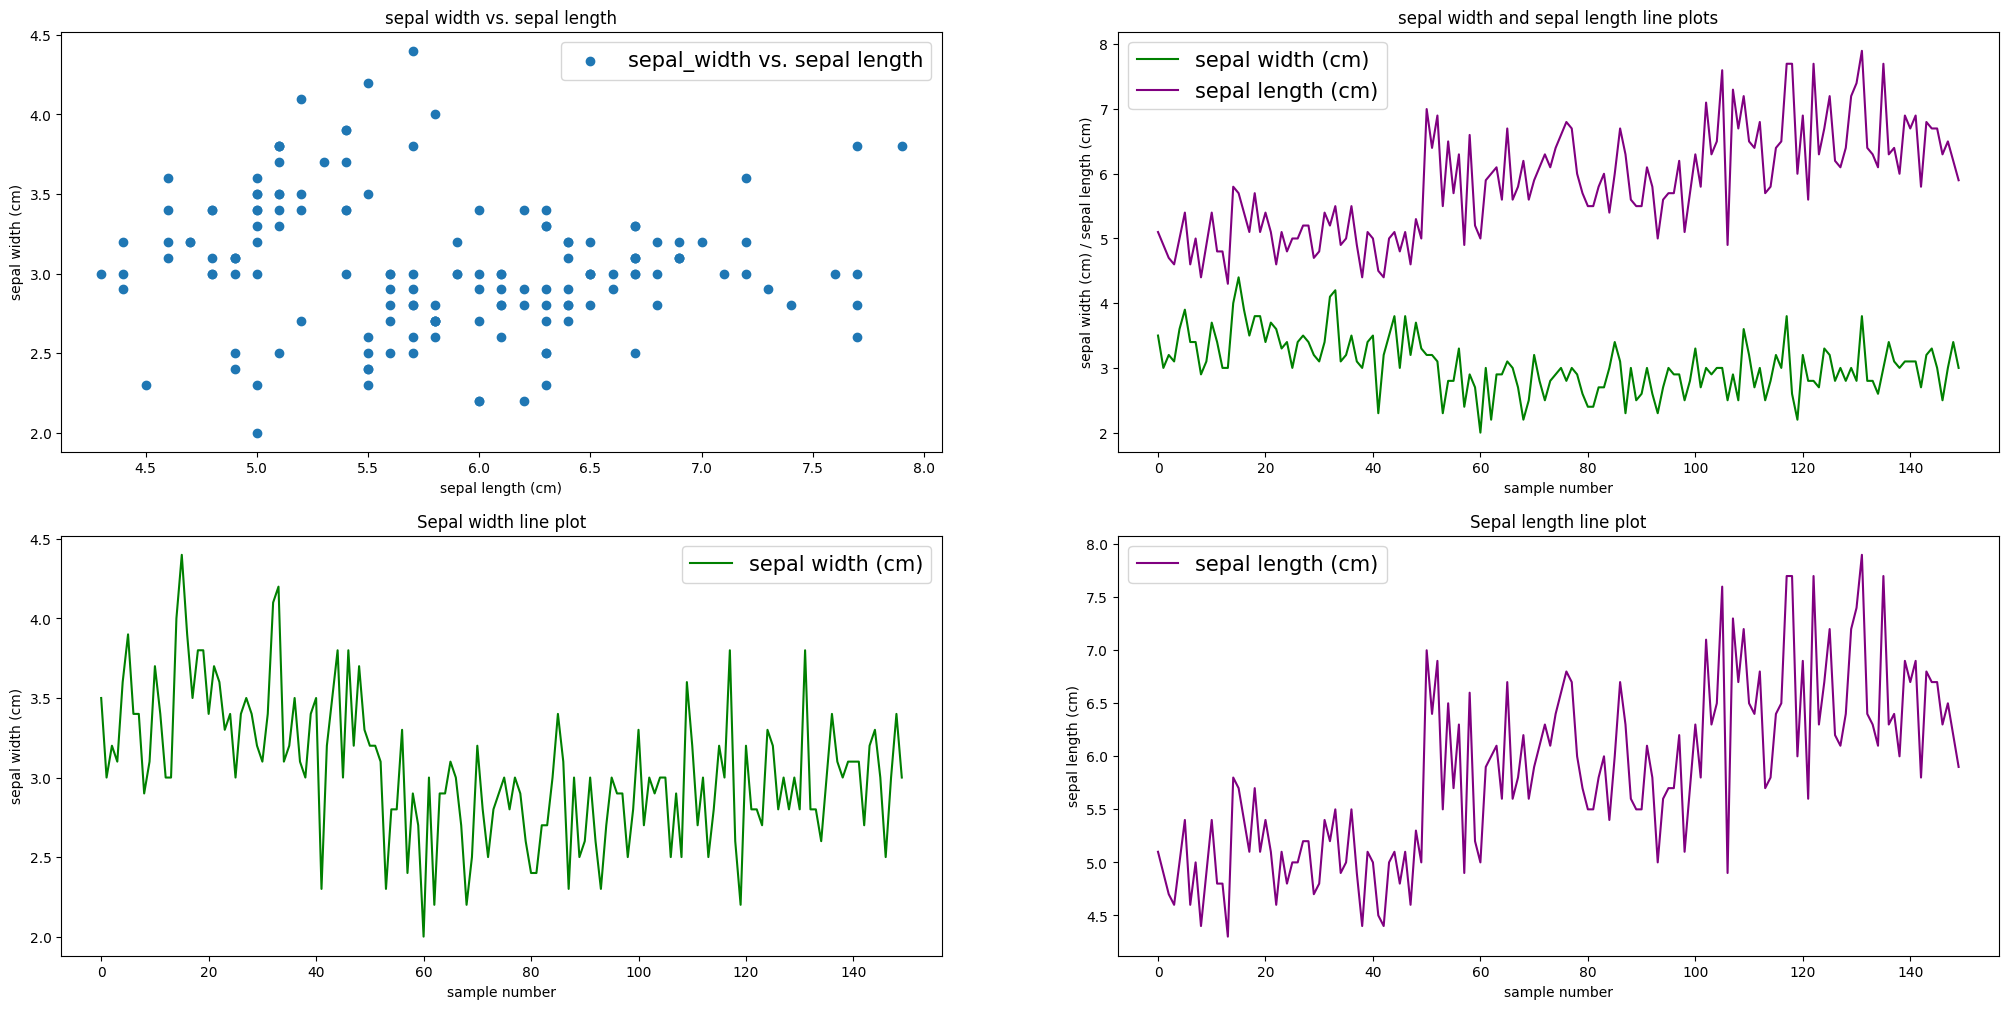

In [46]:
fig, ax = plt.subplots(2, 2, figsize=(25, 12))




ax[0,0].scatter(iris[:,0:1], iris[:,1:2], label='sepal_width vs. sepal length')



ax[0,1].plot(iris[:,1:2], label=iris_features_labels[1], color='green')
ax[1,0].plot(iris[:,1:2], label=iris_features_labels[1], color='green')

ax[0,1].plot(iris[:,0:1], label=iris_features_labels[0], color='purple')
ax[1,1].plot(iris[:,0:1], label=iris_features_labels[0], color='purple')



ax[0,0].legend(loc='best', fontsize=15)
ax[0,0].set_xlabel(iris_features_labels[0])
ax[0,0].set_ylabel(iris_features_labels[1])
ax[0,0].set_title('sepal width vs. sepal length')

ax[0,1].legend(loc='best', fontsize=15)
ax[0,1].set_xlabel('sample number')
ax[0,1].set_ylabel(f'{iris_features_labels[1]} / {iris_features_labels[0]}')
ax[0,1].set_title('sepal width and sepal length line plots')

ax[1,0].legend(loc='best', fontsize=15)
ax[1,0].set_xlabel('sample number')
ax[1,0].set_ylabel(f'{iris_features_labels[1]}')
ax[1,0].set_title('Sepal width line plot')


ax[1,1].legend(loc='best', fontsize=15)
ax[1,1].set_xlabel('sample number')
ax[1,1].set_ylabel(f'{iris_features_labels[0]}')
ax[1,1].set_title('Sepal length line plot')


## Those graphs aren't very helpful to pull insight from so heres a better thing:


In [9]:
# Getting target array and creating masks for each target
targets = np.loadtxt(data_path, delimiter=',', dtype='S', skiprows=1, usecols=(4))

setosa = targets == b'Iris-setosa'
versicolor = targets == b'Iris-versicolor'
virginica = targets == b'Iris-virginica'

print(setosa)


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]


In [10]:
sepal_length = iris[:,0:1]
sepal_width = iris[:,1:2]

# Grabbing sepal length and width for each species
setosa_sepal_length = sepal_length[setosa]
setosa_sepal_width = sepal_width[setosa]

virginica_sepal_length =sepal_length[virginica]
virginica_sepal_width = sepal_width[virginica]

versicolor_sepal_length = sepal_length[versicolor]
versicolor_sepal_width = sepal_width[versicolor]



## Making actually useful graphs

In [11]:
def make_scatter_plot():
    fig, ax = plt.subplots(figsize=(15, 10))

    ax.scatter(x=setosa_sepal_length, y=setosa_sepal_width, color='r', label='Setosa')
    ax.scatter(x=virginica_sepal_length, y=virginica_sepal_width, color='b', label='Virginica')
    ax.scatter(x=versicolor_sepal_length, y=versicolor_sepal_width, color='g', label='Versicolor')

    ax.set_xlabel('sepal length in cm')
    ax.set_ylabel('sepal width in cm')

    ax.set_title('Speal length vs. Sepal width in cm')

    ax.legend(loc='best')
    return ax

### Comments

As we can see there is a clear decision boundary beween Setosa and other species just looking at these two features.     
Making a classifier to predict whether a sample is Setosa or not would be very easy with a logistic regression model.

TO classify between Virginica and Versicolor it may be a little more difficult and we would need to look at other features as well.



Text(0, 0.5, 'Petal width')

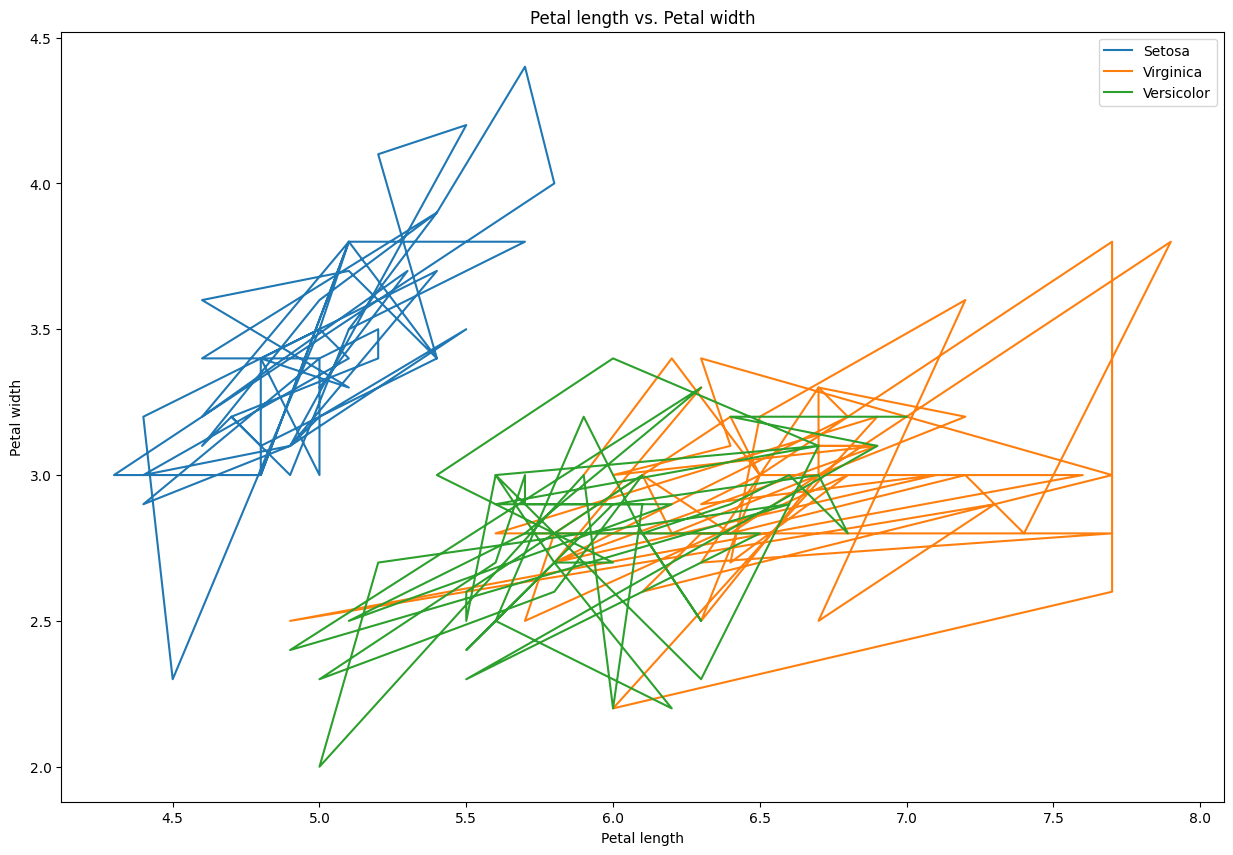

In [12]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(setosa_sepal_length, setosa_sepal_width, label='Setosa')
ax.plot(virginica_sepal_length, virginica_sepal_width, label='Virginica')
ax.plot(versicolor_sepal_length, versicolor_sepal_width, label='Versicolor')
ax.legend(loc='best')
ax.set_title('Petal length vs. Petal width')
ax.set_xlabel('Petal length')
ax.set_ylabel('Petal width')


## Making a classifier to predict whether or not a sample is Setosa or not



In [13]:


log_reg = LogisticRegression()

log_reg.fit(iris[:,0:2], setosa)

predictions = log_reg.predict(iris[:,0:2])

log_reg_cross = LogisticRegression()

cross_val_score = cross_val_score(log_reg_cross, iris, setosa, cv=3)

print(cross_val_score)

acc = accuracy_score(predictions, setosa)

print(f'Accuracy Score: {acc}')



[1. 1. 1.]
Accuracy Score: 1.0


## 100% accuracy, nice...

## Plotting decision boundary

[[-3.40541982  3.15987559]]
[8.4429405]


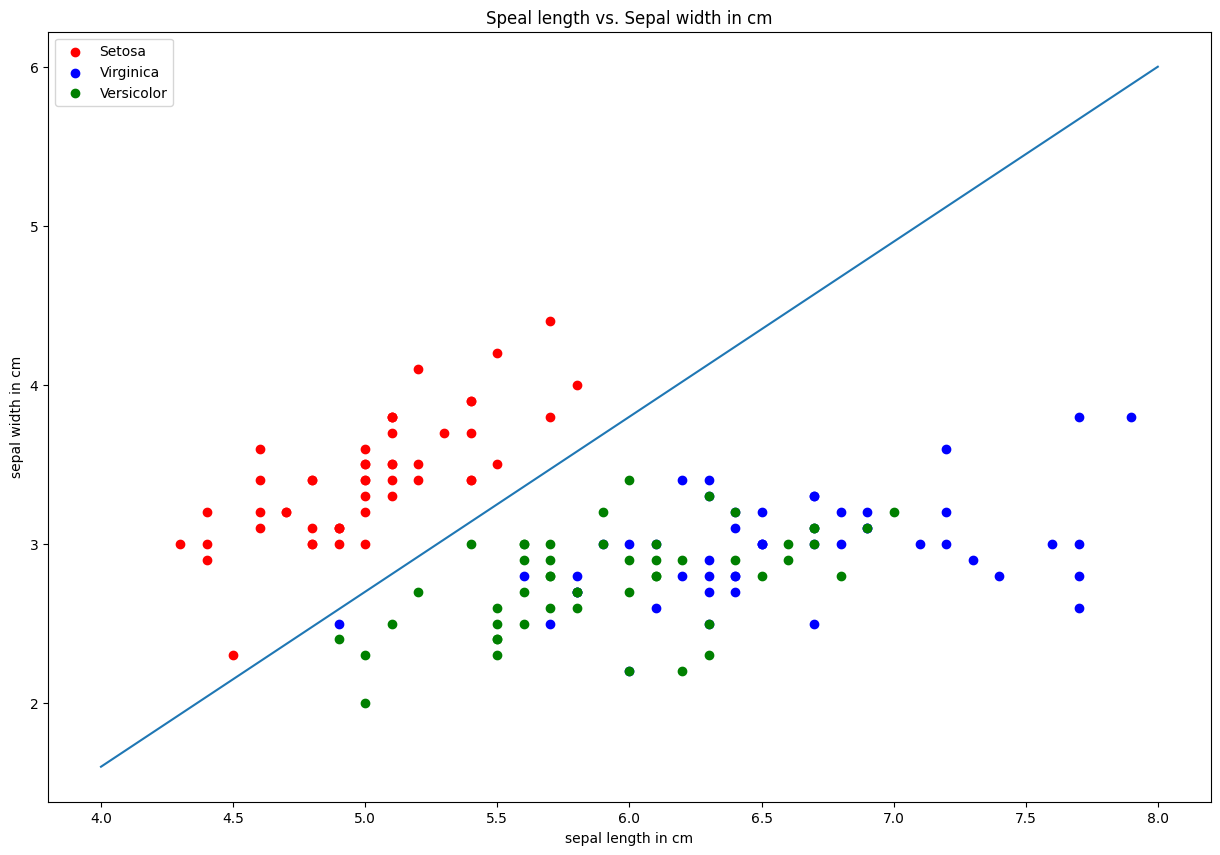

In [45]:
ax = make_scatter_plot()
x = np.linspace(4,8)

y = 1.1 *x - 2.8


print(log_reg.coef_)
print(log_reg.intercept_)
ax.plot(x,y)

### You know what would be cooler, what if we plotted percentages of each prediction


C:\Users\paganinik\AppData\Local\Temp\ipykernel_12840\1333768515.py:13: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  ax_c = fig.colorbar(contour)


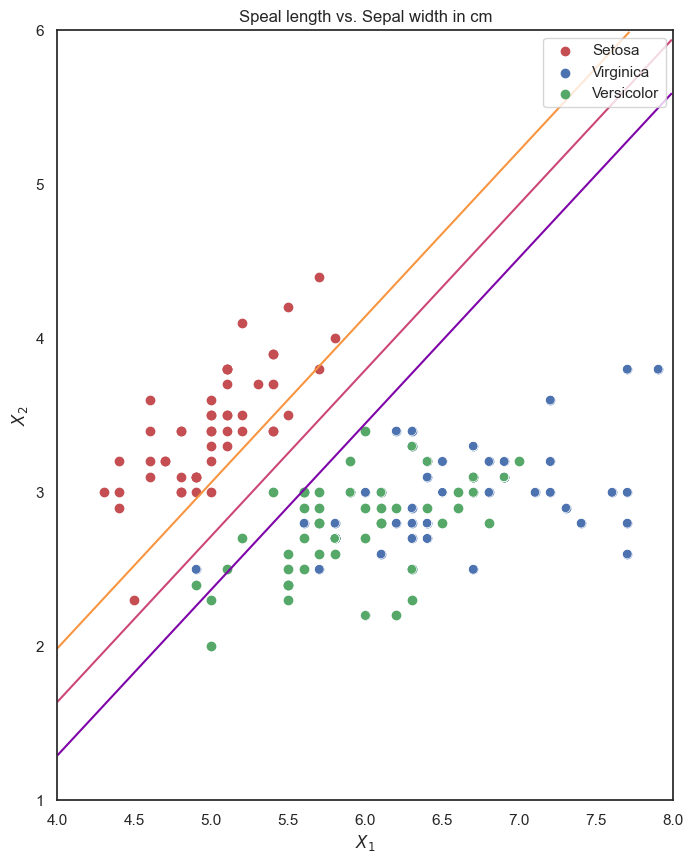

In [66]:
import seaborn as sns
sns.set(style='white')

xx, yy = np.mgrid[4:8:.01, 1:6:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = log_reg.predict_proba(grid)[:, 1].reshape(xx.shape)

ax = make_scatter_plot()

contour = ax.contour(xx, yy, probs,3, cmap="plasma", vmin=0, vmax=1)


ax_c = fig.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(iris[100:,0], iris[100:, 1], c=y[100:], s=50,
           cmap="plasma", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=0.5)

ax.set(aspect="equal",
       xlim=(4, 8), ylim=(1, 6),
       xlabel="$X_1$", ylabel="$X_2$")


ax.legend()


The orange line represents 75% confidence the sample is a setosa. The middle line represents 50% confidence the sample is a setosa and the purple line represents 25% confidence the sample is a setosa

 ### 4) Print all of the feature values for the 150th observation in your dataset.

In [15]:
print(f'150th sample features: {iris[149]}')

150th sample features: [5.9 3.  5.1 1.8]


### 5) Select observations 49-52 from your dataset and print them to the notebook.

In [16]:
print(f'49-52 samples from dataset: \n{iris[49:53]}')

49-52 samples from dataset: 
[[5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]]


### 6) Select all of the entries in your dataset that have their first feature <= 5 and print the first 5 results (Hint: Do this in multiple steps. First make a boolean mask of your matrix)

In [17]:
first_col_iris = iris[:,0:1]
mask = first_col_iris <= 5
selected = first_col_iris[mask]

print(f'First 5 features in {iris_features_labels[0]} under 5 cm:\n{selected[0:5]}')



First 5 features in sepal length (cm) under 5 cm:
[4.9 4.7 4.6 5.  4.6]


### 7) Calculate the median, standard deviation, and mode of the entries selected in the previous step. (Hint 1: these should be done column by column. Hint 2: Don't forget about other packages like scipy!)

In [68]:
# Calculating average and standard deviation
averages_across_cols = np.average(iris, axis=0)
std_dev_across_cols = np.std(iris, axis=0)


# Displaying results
for i in range(len(iris_features_labels)):
    
    print(f'Average {iris_features_labels[i]}: {round(averages_across_cols[i], 2)}')
   
print('')
 
for i in range(len(iris_features_labels)):
    
    print(f'Standard deviation of {iris_features_labels[i]}: {round(std_dev_across_cols[i], 2)}')



Average sepal length (cm): 5.84
Average sepal width (cm): 3.05
Average petal length (cm): 3.76
Average petal width (cm): 1.2

Standard deviation of sepal length (cm): 0.83
Standard deviation of sepal width (cm): 0.43
Standard deviation of petal length (cm): 1.76
Standard deviation of petal width (cm): 0.76


# Experiment 3 - Linear Algebra in Numpy
In this experiment you will be performing a number of linear algebra operations in your jupyter notebook. Check out the linalg module of numpy!

We have started by creating a few vectors and matrices for you.

In [19]:
array_1 = np.array([1, 2, 3, 4, 5], dtype=np.float32)
print(array_1)
array_2 = np.zeros(4, dtype=np.int32)
print(array_2)
matrix_1 = np.ones((4,5), dtype=np.float64)
print(matrix_1)
matrix_2 = np.eye(5,5)
print(matrix_2)

[1. 2. 3. 4. 5.]
[0 0 0 0]
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


You will:
1. Create a few more numpy vectors and matrices
2. Print the number of dimensions each of your numpy vectors and matrices
3. Print the shape (length and dimension) of each of your numpy vectors and matrices
4. Print the datatype used in each of your numpy vectors and matrices
5. Try to compute a dot product on two matrices of with disagreeable dimensions
6. Compute a dot product on two matrices with agreeable dimensions
7. Try to compute element-wise addition on two matrices with disagreeable dimensions
8. Compute an element-wise addition on two matrices with agreeable dimensions
9. Compute the norm (distance) between a vector and itself
10. Compute the norm (distance) between two different vectors
11. Apply a set of linear coefficients to a matrix of observations.

### 1) Create numpy vectors and matrices (we have done a few for you)

In [20]:
cool_matrix = np.arange(20).reshape(5,2,2)
print(f'3 dimension matrix:\n{cool_matrix}') # 3 dimension matrix

even_spaced = np.linspace(start=0, stop=1000, num=101) # vector

print(f'Even spaced vector:\n{even_spaced}')

3 dimension matrix:
[[[ 0  1]
  [ 2  3]]

 [[ 4  5]
  [ 6  7]]

 [[ 8  9]
  [10 11]]

 [[12 13]
  [14 15]]

 [[16 17]
  [18 19]]]
Even spaced vector:
[   0.   10.   20.   30.   40.   50.   60.   70.   80.   90.  100.  110.
  120.  130.  140.  150.  160.  170.  180.  190.  200.  210.  220.  230.
  240.  250.  260.  270.  280.  290.  300.  310.  320.  330.  340.  350.
  360.  370.  380.  390.  400.  410.  420.  430.  440.  450.  460.  470.
  480.  490.  500.  510.  520.  530.  540.  550.  560.  570.  580.  590.
  600.  610.  620.  630.  640.  650.  660.  670.  680.  690.  700.  710.
  720.  730.  740.  750.  760.  770.  780.  790.  800.  810.  820.  830.
  840.  850.  860.  870.  880.  890.  900.  910.  920.  930.  940.  950.
  960.  970.  980.  990. 1000.]


### 2) Print the number of dimensions each of your numpy vectors and matrices

In [21]:
print(f'Number of dimensions for the cool matrix: {len(cool_matrix.shape)}')

# or you could do this
print(f'Number of dimensions for the cool matrix: {cool_matrix.ndim}')

print(f'Number of dimensions for the evenly spaced vector: {len(even_spaced.shape)}')

# or you could do this
print(f'Number of dimensions for the evenly spaced vector: {even_spaced.ndim}')

Number of dimensions for the cool matrix: 3
Number of dimensions for the cool matrix: 3
Number of dimensions for the evenly spaced vector: 1
Number of dimensions for the evenly spaced vector: 1


### 3. Print the sahpe (length and dimension) of each of your numpy vectors and matrices

In [22]:
print(f'Shape for the cool matrix: {cool_matrix.shape}')

print(f'Shape for the evenly spaced vector: {even_spaced.shape}')

Shape for the cool matrix: (5, 2, 2)
Shape for the evenly spaced vector: (101,)


### 4) Print the datatype used in each of your numpy vectors and matrices

In [23]:
print(f'Data type of the cool matrix: {cool_matrix.dtype}')

print(f'Data type of the even spaced vector: {cool_matrix.dtype}')

Data type of the cool matrix: int32
Data type of the even spaced vector: int32


### 5) Try to compute a dot product on two matrices of with disagreeable dimensions

In [24]:
# No bueno
# Commenting out so running all cells is easy
np.dot(cool_matrix, even_spaced)

### 6) Compute a dot product on two matrices with agreeable dimensions

In [25]:
agreeable_1 = np.arange(9).reshape(1,9)
agreeable_2 = np.arange(99).reshape(9,11)

result = np.dot(agreeable_1, agreeable_2)

print(f'Resulting dot product: {result}')


Resulting dot product: [[2244 2280 2316 2352 2388 2424 2460 2496 2532 2568 2604]]


### 7) Try to compute element-wise addition on two matrices with disagreeable dimensions

In [26]:
# No bueno
np.add(agreeable_1, agreeable_2)

### 8) Compute an element-wise addition on two matrices with agreeable dimensions

In [27]:
agreeable_3 = np.arange(6).reshape(3,2)
agreeable_4 = np.linspace(6,12, num=6).reshape(3,2)
print(f'Agreeable 3: \n{agreeable_3}')
print(f'Agreeable 4: \n{agreeable_4}')

print(f'Adding two agreeable together: \n{np.add(agreeable_3,agreeable_4)}')

Agreeable 3: [[0 1]
 [2 3]
 [4 5]]
Agreeable 4: [[ 6.   7.2]
 [ 8.4  9.6]
 [10.8 12. ]]
Adding two agreeable together: 
[[ 6.   8.2]
 [10.4 12.6]
 [14.8 17. ]]


### 9) Compute the norm (distance) between a vector and itself

In [28]:
np.linalg.norm(even_spaced)


5816.786054171152

### 10) Compute the norm (distance) between two different vectors

In [84]:
foo = np.linspace(1,10,num=10).reshape(10,1)
print(foo)
# having shape 10, 1 matters here
# if the shape werwe 1, 10 it would compute a mtrix and not produce
# expected results
# Try it out by adding .T to the following line or the first line
bar = np.ones(shape=(10,1))
print(bar)
print(foo-bar)
np.linalg.norm((foo-bar))

[[ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]]
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]
 [6.]
 [7.]
 [8.]
 [9.]]


16.881943016134134

### 11) Apply a set of linear coefficients to a matrix of observations.
From your problem set you can see the form of this model:

$$ y = \beta^{12}_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} + \beta_{3}x_{3} $$

which can also be represented in vector notation as:

$$ y = x^{T}\mathbf{\beta} $$

Use the vectors that you created in problem 5 of problem set 1 and evaluate it here. Evaluate it twice, once using matrix multiplication and once with dot products

In [30]:
beta = np.arange(start=1, stop=5)
x = np.ones(shape=(4,))

dot = np.dot(x.T, beta)

mat_mul = np.matmul(x, beta)

print(f'Matrix multiplication result: {mat_mul}')

print(f'Dot product: {dot}')

print(f'Difference between the two results: {mat_mul - dot}')


Matrix multiplication result: 10.0
Dot product: 10.0
Difference between the two results: 0.0


# Bonus Material: Additional Indexing Topics

Before considering the following indexing procedures, think about the following question. Can I index a vector (nx1) using a matrix (nxm)? What would happen if I try?

In [31]:
X = np.random.randint(10, size=(10, 3)) 
y = np.expand_dims(np.array([1, 0, 1, 1, 0, 0, 2, 2, 1, 0], dtype=np.int32),axis=1)

print(f'X shape: {X.shape}')
print(f'X matrix: \n{X}')
print(f'y shape: {y.shape}')
print(f'y matrix: \n{y}')

X shape: (10, 3)
X matrix: 
[[2 0 0]
 [9 4 0]
 [3 0 1]
 [6 8 3]
 [8 8 2]
 [9 4 9]
 [5 7 5]
 [1 4 5]
 [1 3 8]
 [0 3 4]]
y shape: (10, 1)
y matrix: 
[[1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [2]
 [2]
 [1]
 [0]]


Think of the above matrix, X, as a feature matrix (10x3) and the above vector, y, as a response vector/matrix (10x1). How can I index and get the first index of X or y? 

In [32]:
y[0,0]

1

In [33]:
X[0,0]

2

What if I want multiple elements from this array that are not sequential? Such as element 0 and element 7?

In [34]:
print(y[0,0])
print(y[7,0])

1
2


Pretty straighforward, eh? Can I do this in one go?

In [35]:
print(y[[0,7],[0,0]]) # the first array are the rows and the second array are the columns

print(y[[6,9],[0,0]])

[1 2]
[2 0]


Not too shabby! Now, is there anything preventing me from re-indexing the same element? Let's try!

In [36]:
print(y[[7,7],[0,0]])

[2 2]


__woah__

Finally, lets take this to a rediculous conclusion... What happens if I supply more index calls (as a matrix) than the variable has in shape?

In [37]:
print(y[[7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


### I was running locally and did not have access to the image which made me sad so here is a very good dog

![ChessUrl](https://gifimage.net/wp-content/uploads/2017/07/funny-animal-gif-3.gif "dog head scratch")
